In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Ejercicio 2.0.2.

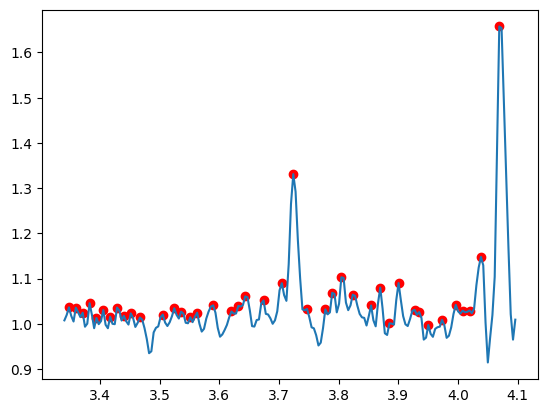

In [3]:
#Primero organizamos los datos x y y del archivo y los colocamos en un array a cada uno
def OrganizeData(f):
    file = open(f)
    x = []
    y = []
    line = file.readline()
    while len(line) > 0:
        data = line.split("  ")
        x.append(float(data[0]))
        y.append(float(data[1]))
        line = file.readline()
    file.close()
    return np.array(x), np.array(y)
#Diseñamos el algoritmo para encontrar los maximos locales
def FindLocalMax(x, y):
    for i in range(1, len(x)-1):
        if y[i] > y[i-1] and y[i] > y[i+1]:
            plt.scatter(x[i], y[i], color="red")
    plt.plot(x,y)
#Luego definimos x y y usando la primera función
datos = OrganizeData("Datos 2.0.2..txt")
x = datos[0]
y = datos[1]
#Graficamos la serie de datos y sus maximos locales
FindLocalMax(x, y)


In [4]:
# Ejercicio 2.0.5.

In [5]:
# a)
theta = np.linspace(0, 2*np.pi, 100)

def r(a, b, theta):
    return a + b*theta

r(0, 1, theta)

array([0.        , 0.06346652, 0.12693304, 0.19039955, 0.25386607,
       0.31733259, 0.38079911, 0.44426563, 0.50773215, 0.57119866,
       0.63466518, 0.6981317 , 0.76159822, 0.82506474, 0.88853126,
       0.95199777, 1.01546429, 1.07893081, 1.14239733, 1.20586385,
       1.26933037, 1.33279688, 1.3962634 , 1.45972992, 1.52319644,
       1.58666296, 1.65012947, 1.71359599, 1.77706251, 1.84052903,
       1.90399555, 1.96746207, 2.03092858, 2.0943951 , 2.15786162,
       2.22132814, 2.28479466, 2.34826118, 2.41172769, 2.47519421,
       2.53866073, 2.60212725, 2.66559377, 2.72906028, 2.7925268 ,
       2.85599332, 2.91945984, 2.98292636, 3.04639288, 3.10985939,
       3.17332591, 3.23679243, 3.30025895, 3.36372547, 3.42719199,
       3.4906585 , 3.55412502, 3.61759154, 3.68105806, 3.74452458,
       3.8079911 , 3.87145761, 3.93492413, 3.99839065, 4.06185717,
       4.12532369, 4.1887902 , 4.25225672, 4.31572324, 4.37918976,
       4.44265628, 4.5061228 , 4.56958931, 4.63305583, 4.69652

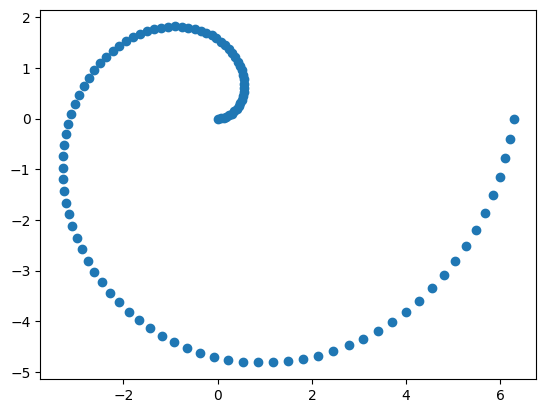

In [6]:
# b)
def CambioCoordenadas(r, theta):
    x = np.zeros_like(theta)
    y = np.zeros_like(theta)
    for i in range(len(theta)):
        x[i] = r[i]*np.cos(theta[i])
        y[i] = r[i]*np.sin(theta[i])
    plt.scatter(x, y)
    plt.show()

r = r(0, 1, theta)
CambioCoordenadas(r, theta)

In [7]:
#Ejercicio de derivación 2


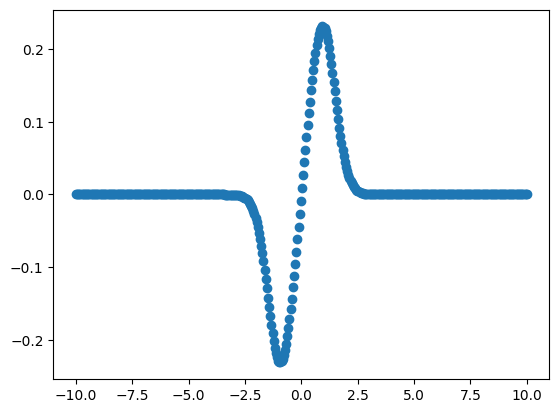

In [8]:
# a)
# Se define la función de derivada central
def CentralDerivative(f,x,h=0.05): 
  return (f(x+h)-f(x-h))/(2*h)
#Se define la función de f(x)
def Funcion(x):
    return 1/np.sqrt(1+(np.exp(-x**2)))
#Se marca el intervalo que se va a tratar de la función usando linspace.
#Se usa 400 porque el diametro del intervalo es 20 y cada dato debería estar espaciado 0.05.
#20/0.05 = 400.
x = np.linspace(-10, 10, 400)
#Se defina la derivada de la función f(x) usando la función creada para derivada central
df = CentralDerivative(Funcion, x)
#Se grafica la derivada estimada en el intervalo -10, 10
plt.scatter(x, df)



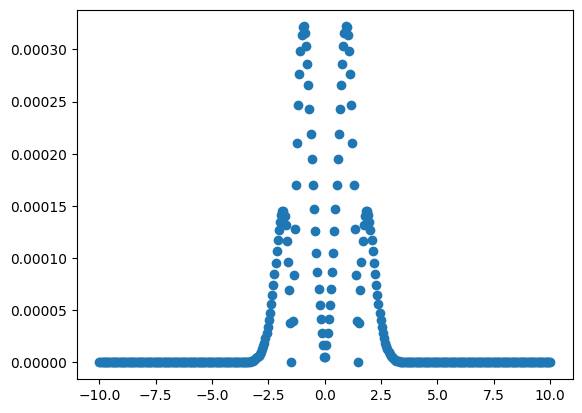

In [9]:
# b)
#Se define la función de la derivada exacta
def DerivadaExacta(x):
    return (np.exp(-x**2)*x)/(1+np.exp(-x**2))**(3/2)
#Definimos el error en cada punto nodal como la diferencia entre el punto en la derivada real y la estimada.
Error =  np.abs(DerivadaExacta(x) - df)
#Graficamos el error para cada punto nodal.
plt.scatter(x, Error)

In [10]:
# Ejercicio de Derivación 6

In [11]:
#a)
#Definimos el soporte de la función
x = np.linspace(-4, 4, 25)
y = np.linspace(-4, 4, 25)
X,Y = np.meshgrid(x, y)



In [12]:
#b)
#Definimos la función potencial de flujo para un cilindro de radio 2cm y V=2cm/s
def PotencialFlujo(x, y, V=2, R=2):
    return V*x*(1-(R**2)/(x**2 + y**2))

In [13]:
#c)
#Creamos la función de derivada parcial central para x
def PartialCentralDerivativeX(f, x, y, h= 0.001):
    dfx = (f(x+h, y)-f(x-h, y))/(2*h)
    #Filtramos el campo de velocidad x dentro del cilindro igual a cero
    dfx[(x**2 + y** 2) <= 4] = 0
    return dfx
#Creamos la función de derivada parcial central para y
def PartialCentralDerivativeY(f, x, y, h= 0.001):
    dfy = (f(x, y+h)-f(x, y-h))/(2*h)
    #Filtramos el campo de velocidad y dentro del cilindro igual a cero
    dfy[(x**2 + y** 2) <= 4] = 0
    return dfy
#Guardamos los campos de velocidades como indica las notas de clase
vx = PartialCentralDerivativeX(PotencialFlujo, X, Y)
vy = -PartialCentralDerivativeY(PotencialFlujo, X, Y)


[]

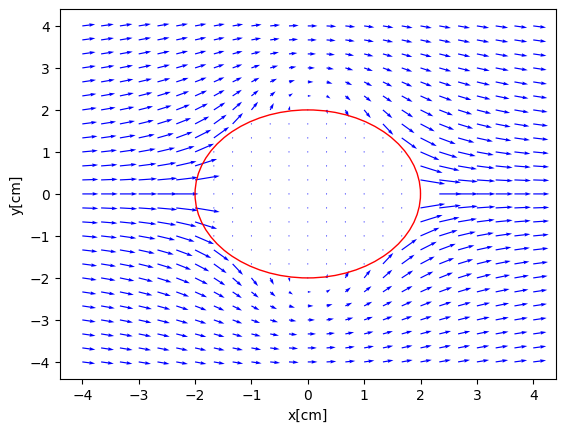

In [14]:
#d) Dibujamos el campo de velocidades
ax = plt.subplot()
ax.set_xlabel("x[cm]")
ax.set_ylabel("y[cm]")
ax.quiver(X, Y, vx, vy, color = "blue")
circle = plt.Circle((0, 0), 2, color='red', fill= False)
ax.add_patch(circle)
ax.plot()
